# Z-projections: te basics

Date: 2018-06-01  
Author: Clàudia Salat 
Categories: image processing  
Tags: z-stacks, projection
<!--eofm-->



When it comes to capturing intricate intracellular structures or achieving the sharpest focus in microscopy images, acquiring Z-stacks is crucial. Z-stacks allow us to collect a series of images at different focal planes, providing a comprehensive view of the specimen. When processing these images, usually we would like to create Z-projection to reconstruct our structure of interest.

Let's learn how to do it using Python🐍!
## Import packages 
First of all let's import the required packages.

In [6]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

image = data.cells3d()


## Import image

As an example, will use an image from *skimage* package.
Using *.shape* we can inspect the dimensions of the image. 

In [8]:
image = data.cells3d()
print (image.shape)

(60, 2, 256, 256)


As you can see the image is composed of 4-dimensions. 
 - Z-stacks are stored in the first dimension. There are 60.
 - Channels are stored in the second dimension. Channel 0 contains the membranes and channel 1 the nuclei of the cells
 - X and Y are stored in the third and fourth dimension.

For this example, we will only keep the nuclei to work with a 3D array.

In [10]:
image_3d = image[:,1,:,:] # by using : we indicate we take all the values contained on that dimension

Let's take a look at the resulting image. 
Since only 2D images can be visualized we will reduce one dimension to inspect the content.

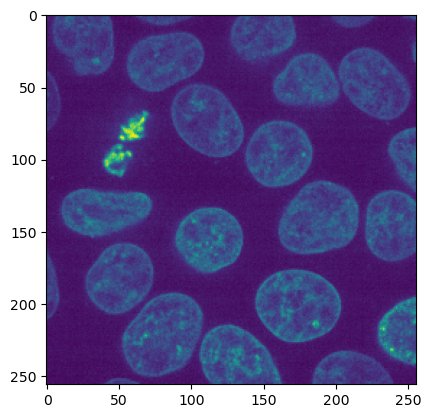

In [12]:
plt.imshow(image_3d[30,:,:]) # showing middle z-slice 

Amazing! We have captured a mitotic event 🔬

## Types of projections

There are several types of projections we can do using the Numpy package. I will briefly comment the most commons:  <br>
    - **Maximum projection:** takes the brightest pixel for a given pixel across the stack. Ideal to highlight bright structures or cellular organelles that are not present in all the z-planes.  <br>
    - **Average projection:** computes the average intensity for a given pixel across the stack. Good for noise reduction. <br>
    - **Minimum projection:** takes the least bright pixel for a given position across the stack. Useful to emphasize dark areas like internal vesicles. <br>

When using the **np.** function we have to speficy which axis of the 3D we want to project. In this case, z-stack is located at axis = 0.
Let's try them!

In [14]:
# Compute projections
max_img = np.max(image_3d, axis = 0)
avg_img = np.mean(image_3d, axis = 0)
min_img = np.min (image_3d, axis = 0)

Let's add a bit more complex chunk of code to visualize the result. Don't get scared! 

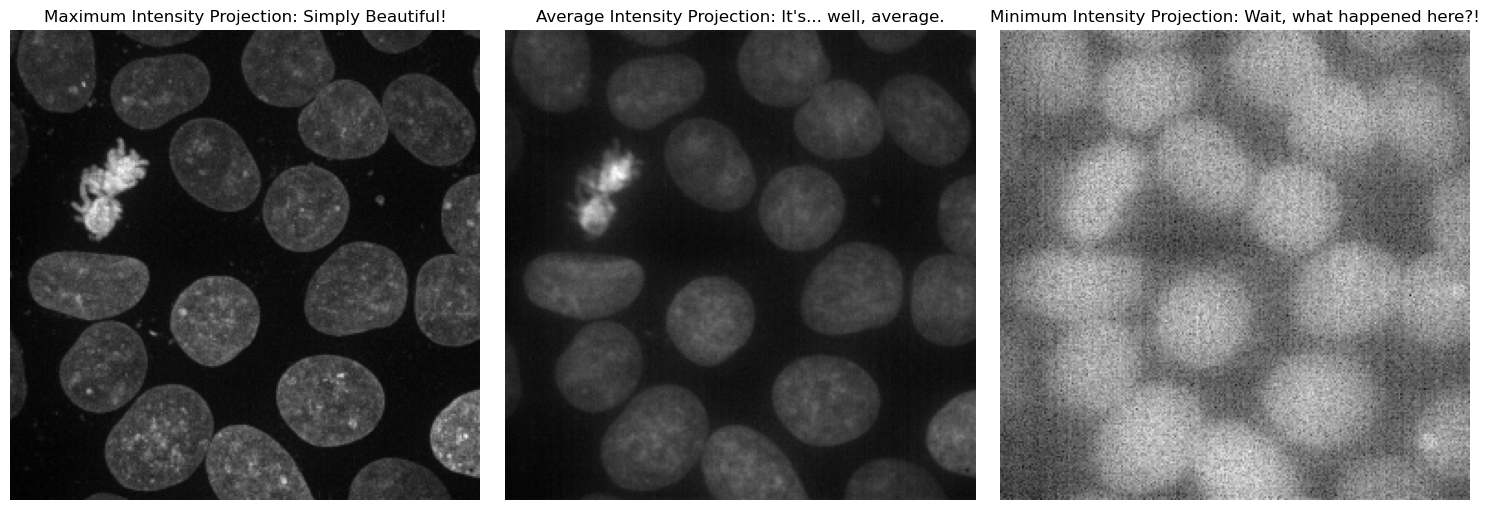

In [16]:
# Create a figure and subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the Maximum Intensity Projection
axes[0].imshow(max_img, cmap='gray')
axes[0].set_title('Maximum Intensity Projection: Simply Beautiful!')

# Display the Average Intensity Projection
axes[1].imshow(avg_img, cmap='gray')
axes[1].set_title('Average Intensity Projection: It\'s... well, average.')

# Display the Minimum Intensity Projection
axes[2].imshow(min_img, cmap='gray')
axes[2].set_title('Minimum Intensity Projection: Wait, what happened here?!')

# Remove axes for a cleaner look
for ax in axes:
    ax.axis('off')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

The appearance of the minimum projection has raised some concerns. Let’s take a closer look at the image to understand what’s going on...

Remember that at the begining we checked the aspect of the middle plane. Let's check also first and second plane.

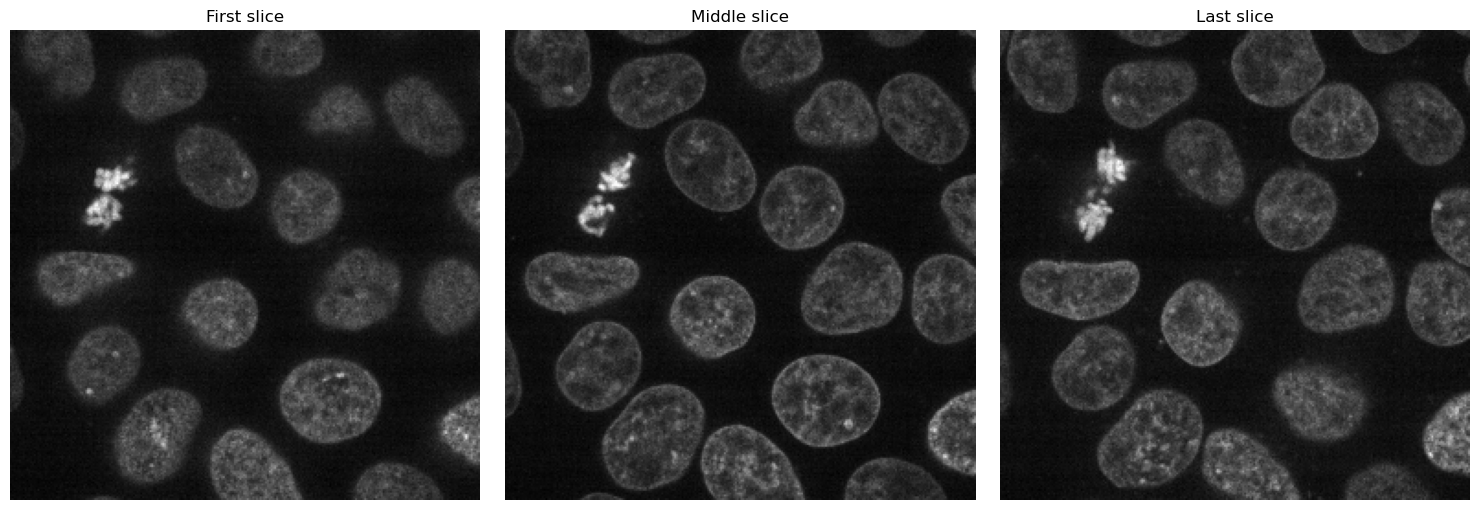

In [26]:
# To take single planes of the z-stack image
img_3d_slice0 = image_3d[0,:,:]
img_3d_slice30 = image_3d[30,:,:]
img_3d_slice59 = image_3d[59,:,:]

#Let's plot reusing the same code than before 
# Create a figure and subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the Maximum Intensity Projection
axes[0].imshow(img_3d_slice0, cmap='gray')
axes[0].set_title('First slice')

# Display the Average Intensity Projection
axes[1].imshow(img_3d_slice30, cmap='gray')
axes[1].set_title('Middle slice')

# Display the Minimum Intensity Projection
axes[2].imshow(img_3d_slice59, cmap='gray')
axes[2].set_title('Last slice')

# Remove axes for a cleaner look
for ax in axes:
    ax.axis('off')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Aha, mystery solved! It turns out the slices near the edges of the stack contain out-of-focus regions.
By changing the number in axis 0 of the function *img = image_3d[0,:,:]*, we can scan through the stack. Try it yourself by modifying the code above.

I've checked that the range between slices 30 and 40 is properly in focus. Let's redo the minimum projection using this range.
To do so we have to reduce the dimensions of the picture to the given range.

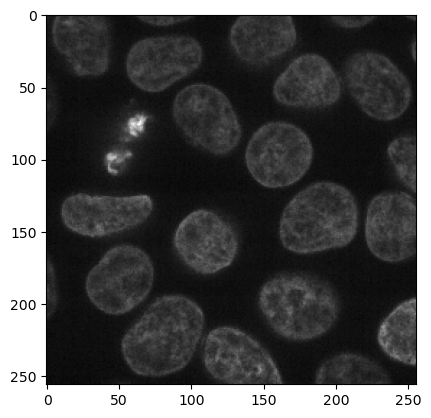

In [39]:
img_3d_selection = image_3d [30:40,:,:] # to specify a range of values at axis 0, using a semicolon

min_img_sel = np.min (img_3d_selection, axis= 0) # to do the projection

plt.imshow(min_img_sel, cmap='gray') # to visualize the output image


Voilà! Compare this image with the maximum projection to see how cell cavities are highlighted in the minimum projection.

## Let's wrap up [intermediate difficulty 😮‍💨]

To incorporate all this code in a reusable chunk, we can create a function!

The single 'mandatory' input for this function is the 3D image. We can also specify the projection type and axis; otherwise, a maximum projection along axis 0 will be performed by default.


In [ ]:
def projection(image, projection_type='max', axis = 0):
    """
    Computes the specified projection (max, min, or average) of a 3D image stack.

    Parameters:
    -----------
    image_3d : numpy.ndarray
        A 3D array representing the image stack (z, x, y).
    
    projection_type : str, optional, default='max'
        The type of projection to compute. Options are:
        - 'max' for Maximum Intensity Projection
        - 'min' for Minimum Intensity Projection
        - 'avg' for Average Intensity Projection
    
    axis : int, optional, default=0
        The axis along which to compute the projection (0 = , 1 = , 2 = ).
    
    Returns:
    --------
    projection : numpy.ndarray
        The 2D projection image.
    """
    
    # Choose the projection type
    if projection_type == 'max':
        projection = np.max(image, axis=0)
    elif projection_type == 'min':
        projection = np.min(image, axis=0)
    elif projection_type == 'avg':
        projection = np.mean(image, axis=0)
    else:
        raise ValueError("Invalid projection type. Choose from 'max', 'min', or 'avg'.")
    return projection

    